# TASK2 MOVIE RATING PREDICTION WITH PYTHON

## AIM

Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

### Reading and Understanding the Data

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [100]:
df= pd.read_csv('IMDb Movies India.csv',encoding='latin1')

In [101]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [102]:
df.shape

(15509, 10)

## Data Cleaning

In [103]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [105]:
# Locating rows with missing values in columns from 1 to 9

nulls = df[df.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
#Checking if there are any typos

for col in df.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(df[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)'

## Handling the null values

In [107]:

df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

## Extracting only the text part from the Name column

In [108]:

df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')

## Replacing the brackets from year column as observed above

In [109]:
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

## Convert 'Duration' to numeric and replacing the min

In [110]:
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

## Splitting the genre by , to keep only unique genres and replacing the null values with mode

In [111]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

## Convert 'Votes' to numeric and replace the , to keep only numerical part

In [112]:
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

In [113]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


## checking duplicate values by Name and Year

In [114]:
duplicate = df.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3,Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Aur Pyaar Ho Gaya,1997,147,Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


## Dropping the duplicated values by Name

In [115]:
df = df.drop_duplicates(subset=['Name'], keep=False)

## Exploratory Data Analysis

In [116]:
df.describe()

,Year,Duration,Rating,Votes
count,1528.000000,1528.000000,1528.000000,1528.000000
mean,1997.972513,123.823953,5.976243,552.479712
std,21.181921,25.108144,1.412547,4311.631841
min,1931.000000,45.000000,1.600000,5.000000
25%,1985.000000,107.000000,5.100000,14.000000
50%,2004.000000,126.000000,6.100000,34.000000
75%,2016.000000,140.000000,7.000000,127.250000
max,2021.000000,300.000000,9.400000,101014.000000


In [117]:
df.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,1528,1528.000000,1528.000000,1528,1528.000000,1528.000000,1528,1528,1528,1528
unique,1528,NaN,NaN,20,NaN,NaN,1114,1010,1131,1154
top,Gadhvi,NaN,NaN,Drama,NaN,NaN,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,NaN,NaN,789,NaN,NaN,13,22,12,16
mean,NaN,1997.972513,123.823953,NaN,5.976243,552.479712,NaN,NaN,NaN,NaN
std,NaN,21.181921,25.108144,NaN,1.412547,4311.631841,NaN,NaN,NaN,NaN
min,NaN,1931.000000,45.000000,NaN,1.600000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1985.000000,107.000000,NaN,5.100000,14.000000,NaN,NaN,NaN,NaN
50%,NaN,2004.000000,126.000000,NaN,6.100000,34.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,140.000000,NaN,7.000000,127.250000,NaN,NaN,NaN,NaN


## votes Information

In [118]:
# Find the row with the highest number of votes
max_votes_row = df[df['Votes'] == df['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highest_votes = max_votes_row['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_highest_votes = max_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_highest_votes)
print("Number of votes for the movie with the highest votes:", votes_highest_votes)
print('\n', '='*100, '\n')


# Find the row with the lowest number of votes
min_votes_row = df[df['Votes'] == df['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_lowest_votes = min_votes_row['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
votes_lowest_votes = min_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_lowest_votes)
print("Number of votes for the movie with the highest votes:", votes_lowest_votes)

Movie with the highest votes: My Name Is Khan
Number of votes for the movie with the highest votes: 101014


Movie with the highest votes: Anmol Sitaare
Number of votes for the movie with the highest votes: 5


## Rating Information

In [119]:
# Find the row with the highest rating
max_rating_row = df[df['Rating'] == df['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
votes_highest_rating = max_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_highest_rating)
print("Number of votes for the movie with the highest rating:", votes_highest_rating)
print('\n', '='*100, '\n')


# Find the row with the lowest rating
min_rating_row = df[df['Rating'] == df['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
votes_lowest_rating = min_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_lowest_rating)
print("Number of votes for the movie with the highest rating:", votes_lowest_rating)

Movie with the highest rating: June
Number of votes for the movie with the highest rating: 18


Movie with the highest rating: Mumbai Can Dance Saalaa
Number of votes for the movie with the highest rating: 43


## Director Information

In [120]:
# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = df['Director'].value_counts()

# Find the director with the highest number of movies directed
most_prolific_director = director_counts.idxmax()
num_movies_directed = director_counts.max()

print("Director with the most movies directed:", most_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)
print('\n', '='*100, '\n')


# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = df['Director'].value_counts()

# Find the director with the lowest number of movies directed
least_prolific_director = director_counts.idxmin()
num_movies_directed = director_counts.min()

print("Director with the most movies directed:", least_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)

Director with the most movies directed: Kanti Shah
Number of movies directed by Kanti Shah : 13


Director with the most movies directed: Sikandar Khanna
Number of movies directed by Kanti Shah : 1


In [121]:
#replacing null values with the most common rating given to an Indian Movie
df['Rating'].fillna(df['Rating'].mode().max(),inplace=True)

#replacing null values with average duration of a movie in India
df['Duration'].fillna(df['Duration'].mean(),inplace=True)

#replacing null values with average votes recived by a Movie
df['Votes'].fillna(df['Votes'].mean(),inplace=True)

# The Best Rate Ever Given to an Indian Movie

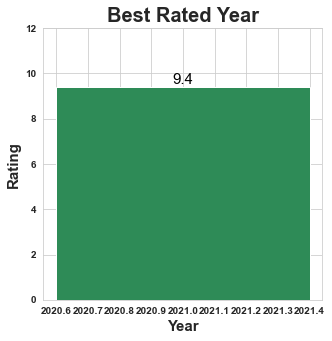

In [122]:
#sorting the Year and Rating by Rating then selecting the top one
best_rating=df[['Year','Rating']].sort_values(by='Rating',ascending=False).head(1)


#Plotting Bar Graph
fig=plt.figure(figsize=(5,5))
bars=plt.bar(x='Year',height='Rating',data=best_rating,color='seagreen')

plt.xlabel("Year",fontsize=15,fontweight='bold')
plt.ylabel("Rating",fontsize=15,fontweight='bold')
plt.title("Best Rated Year",fontsize=20,fontweight='bold')

plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')


#Plotting the labels for Bars for better visualization
for ele in bars:
    plt.text(ele.get_x()+(ele.get_width()/2),ele.get_y()+ele.get_height(),ele.get_height(),color='black',ha='center',
             va='bottom',fontsize=15)

###### We can cleary see that in Year 2020 an Indian movie recieved 10.0 points on IMDB,which is quite suspicious for me though

### Overall Top 5 Ratings Given

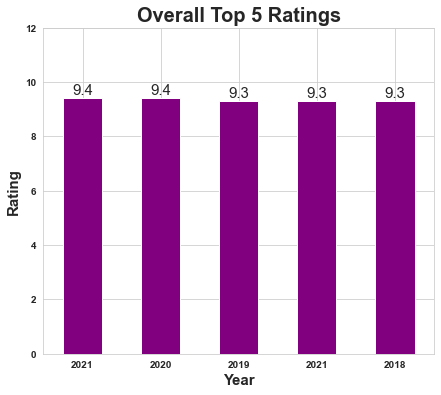

In [123]:
#sorting Values of Year and Rating by Rating then selecting top 5
top5_rating=df[['Year','Rating']].sort_values(by='Rating',ascending=False).head()

#Plotting Bar Graph
bars=top5_rating.plot(kind='bar',x='Year',y='Rating',color='purple',legend=None,figsize=(7,6))

plt.xlabel("Year",fontsize=15,fontweight='bold')
plt.ylabel("Rating",fontsize=15,fontweight='bold')
plt.title("Overall Top 5 Ratings",fontsize=20,fontweight='bold')

plt.xticks(fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')


#Plotting Labels for bars
for bar in bars.patches:
    bars.annotate(format(bar.get_height(),'.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  

### Top 10 Movies According to Ratings

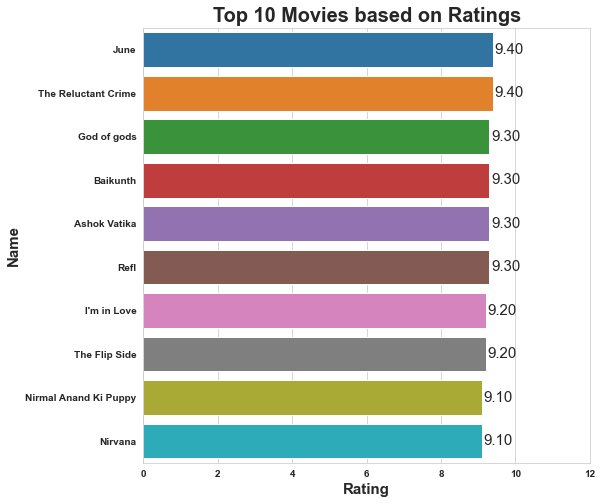

In [124]:
# Initializing the figure of the chart
plt.figure(figsize=(8, 8))

# Dropping the index where Year is 2022, if it exists
dframe = df.set_index('Year')
if '2022' in dframe.index:
    dframe.drop(index='2022', inplace=True)

# Sorting Name and Rating by Rating then selecting top 10
top_movies = dframe[['Name', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

# Plotting Bar chart
plots = sns.barplot(x="Rating", y="Name", data=top_movies)

# Plotting Labels for bars
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.2f'),
                   (bar.get_x() + bar.get_width() + 0.3,
                    bar.get_y() + bar.get_height() / 2),
                   ha='center', va='center', size=15, xytext=(5, 0),
                   textcoords='offset points')

plt.xlabel("Rating", fontsize=15, fontweight='bold')
plt.ylabel("Name", fontsize=15, fontweight='bold')
plt.title("Top 10 Movies based on Ratings", fontsize=20, fontweight='bold')

plt.xticks(np.arange(0, 13, 2), fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

## Top 10 Actors Who appears in most of the movies

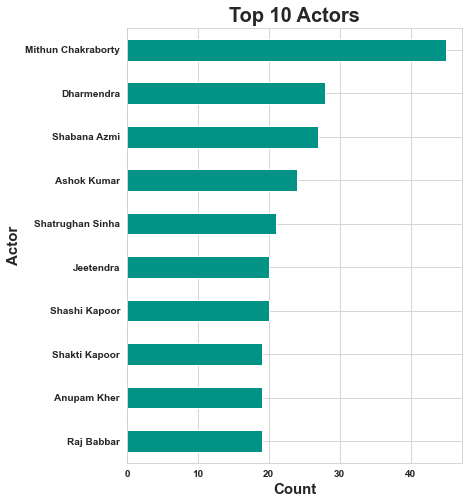

In [125]:
#Making Series for the all the columns of Actors
Actor1=df['Actor 1']
Actor2=df['Actor 2']
Actor3=df['Actor 3']

#Concatinating the series in one series
Actors = pd.concat([Actor1,Actor2,Actor3])

#sorting series by counts then selecting top 10
frequent_actor=Actors.value_counts().sort_values(ascending=False).head(10)

#Plotting Bar graph
frequent_actor.sort_values().plot(kind='barh',color='#029386',figsize=(6,8))

plt.title('Top 10 Actors',fontweight='bold',fontsize=20)
plt.xlabel('Count',fontweight='bold',fontsize=15)
plt.ylabel('Actor',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

###### Here Mithun Chakraborty appears in most of the movies. Note that it doesn't specify if he was main protagonist/antagonist or supporting actor.

### Top 10 Genres for an Indian Movie

In [126]:
#Importing Counter to count distinct values form perticular series
from collections import Counter

#creating series for Genre column
Genre=dframe['Genre']

#initializing counter object
Genre_counter=Counter()

#splitting the values if one row contain more than two values
for response in Genre:
    Genre_counter.update(response.split(','))
    
#Printing the top 10 values with occured most of the time
print(Genre_counter.most_common(10))

#Creating List to store the Counter values
Genres=[]
frequency=[]

for items in Genre_counter.most_common(10):
    Genres.append(items[0])
    frequency.append(items[1])

    
#As Drama Appears more than twice in the List
Genres.pop(2)
frequency.pop(2)
#this will not affect the data as Drama will remain on top whether we add them or remove them 

[('Drama', 789), ('Comedy', 176), ('Action', 142), ('Romance', 118), ('Thriller', 76), ('Horror', 68), ('Family', 28), ('Documentary', 25), ('Crime', 20), ('Fantasy', 17)]


142

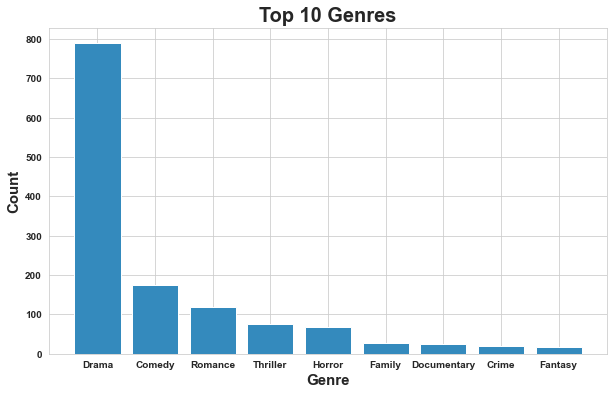

In [127]:
#Plottin bar graph
fig= plt.figure(figsize=(10,6))
plt.bar(Genres,frequency,color='#348ABD')
plt.title('Top 10 Genres',fontweight='bold',fontsize=20)
plt.xlabel('Genre',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',rotation=0)
plt.yticks(fontweight='bold')
plt.show()

###### In India Most of the movies are of Drama and Action Genres.

## Top 10 Directors,Actor1,Actor2 and Actor3

In [128]:
#Creating a Funtion for plotting graphs 
def top10(column):
    global dframe
    dframe[column].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',
                                                                            figsize=(15,6),color='#988ED5')
    
    plt.xlabel(column,fontsize=15,fontweight='bold')
    plt.ylabel('Count',fontweight='bold',fontsize=15)
    plt.title("Top 10 {}".format(column),fontsize=25,fontweight='bold')
    plt.xticks(rotation=0,fontsize=9,fontweight='bold')
    plt.yticks(fontsize=10,fontweight='bold')
    plt.show()

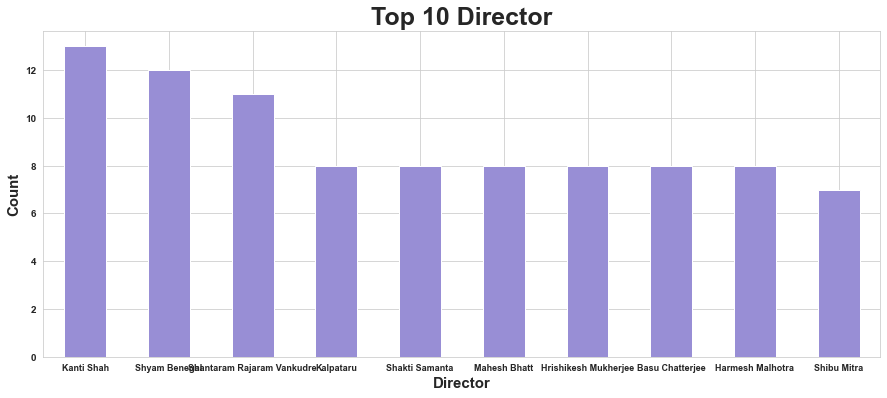

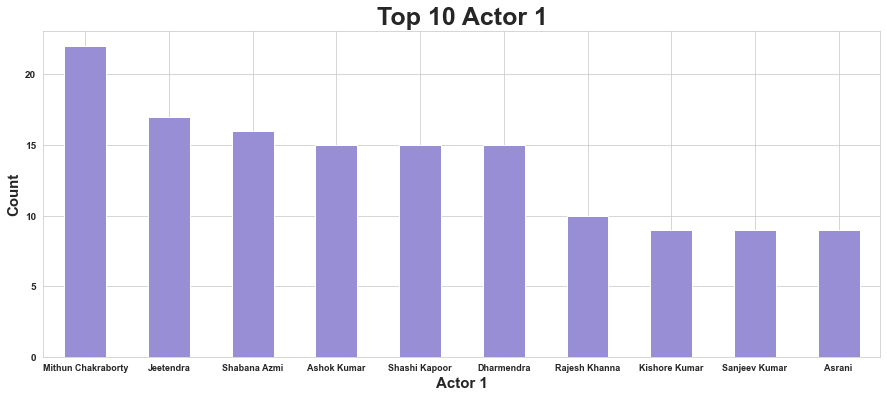

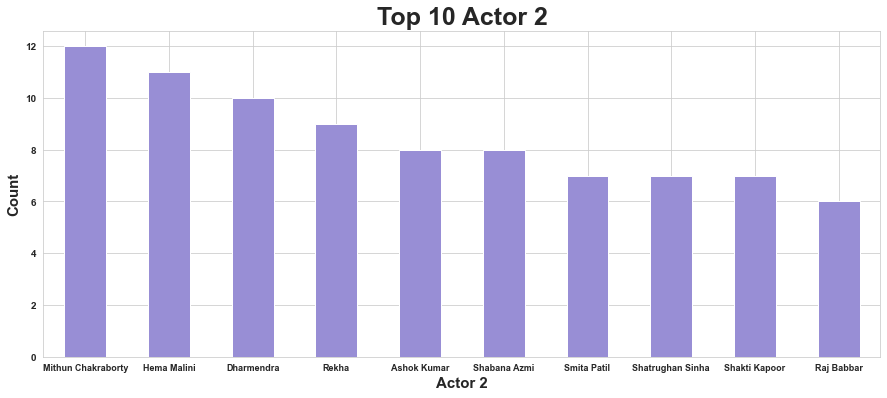

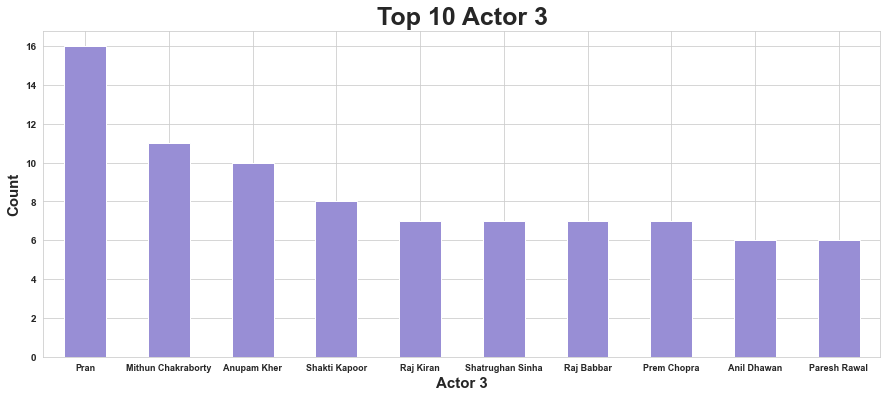

In [129]:
#Looping the columns then calling the funtion to plot graph
cols=['Director','Actor 1','Actor 2','Actor 3']
for items in cols:
    top10(items)

## Distribution of Year

In [130]:

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create histogram plot using Plotly Express
fig_year = px.histogram(df, x='Year', histnorm='probability density', nbins=30, color_discrete_sequence=colors)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(
    title='Distribution of Year',
    title_x=0.5,
    title_pad=dict(t=20),
    title_font=dict(size=20),
    xaxis_title='Year',
    yaxis_title='Probability Density',
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    bargap=0.02,
    plot_bgcolor='white'
)

## Didtribution of Time Duration

In [131]:
fig_duration = px.histogram(df, x = 'Duration', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_duration.update_traces(selector=dict(type='histogram'))
fig_duration.update_layout(title='Distribution of Duration', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_duration.show()

## Didtribution of Rating

In [132]:
fig_rating = px.histogram(df, x = 'Rating', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_rating.update_traces(selector=dict(type='histogram'))
fig_rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_rating.show()

## Didtribution of Votes

In [133]:
fig_votes = px.box(df, x = 'Votes', color_discrete_sequence = colors)
fig_votes.update_layout(title='Distribution of Votes', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Votes', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_votes.show()

## Top 20 Years Average Rating

In [134]:
year_avg_rating = df.groupby('Year')['Rating'].mean().reset_index()

top_5_years = year_avg_rating.nlargest(20, 'Rating')
fig = px.bar(top_5_years, x='Year', y='Rating', title='Top 20 Years by Average Rating', color = "Rating", color_continuous_scale = "darkmint")
fig.update_xaxes(type='category')  
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating', plot_bgcolor = 'white')
fig.show()

## Trend in Rating across Year

In [135]:
# Group data by Year and calculate the average rating
average_rating_by_year = df.groupby('Year')['Rating'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in ratings across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [136]:
# Group data by Year and calculate the average rating
average_rating_by_year = df.groupby('Year')['Votes'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Votes', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in votes across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Votes', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

## Average Rating By Year for Top 5 Genres

In [137]:
# Group data by Year and calculate the average rating
average_rating_by_year = df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 5 genres
top_5_genres = df['Genre'].value_counts().head(5).index

# Filter the data to include only the top 5 genres
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_5_genres)]

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color = "Genre", color_discrete_sequence=['#559C9E', '#0B1F26', '#00CC96','#2ca02c','#9467bd'])

# Customize the layout
fig.update_layout(title='Average Rating by Year for Top 5 Genres', xaxis_title='Year', yaxis_title='Average Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='white')

# Show the plot
fig.show()

## Impact of Movie length on Rating

In [138]:
fig_dur_rat = px.scatter(df, x = 'Duration', y = 'Rating', trendline='ols', color = "Rating", color_continuous_scale = "darkmint")
fig_dur_rat.update_layout(title='Does length of movie have any impact on rating?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Rating of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_rat.show()

## Impact of Movie length on Votes 

In [139]:
fig_dur_votes = px.scatter(df, x = 'Duration', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "darkmint")
fig_dur_votes.update_layout(title='Does length of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Votes of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_votes.show()

## Impact of Movie Rating on Votes 

In [140]:
fig_rat_votes = px.scatter(df, x = 'Rating', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "darkmint")
fig_rat_votes.update_layout(title='Does Ratings of movie have any impact on Votes?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Ratings of Movies', yaxis_title='Votes of movies', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_rat_votes.show()

## Data processing

## Dropping non essential columns

In [141]:
df.drop('Name', axis = 1, inplace = True)

## Features Extraction 

In [142]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

## Split Data for Traing 

In [143]:
# Keeping the predictor and target variable

X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']


In [144]:
# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

## Machine learning Model

# LinearRegression Model 

In [145]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


# RandomForestRegression Model

In [146]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

## Model Evaluation 

In [147]:
# Evaluating the performance of trained algos

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.1397803872882309
Mean absolute error:  0.2714695087658442
R2 score:  0.926720988593957


The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  0.1219776568627452
Mean absolute error:  0.1964607843137264
R2 score:  0.9360539609173046


# Performance
#### The performance evaluation revealed that **Random Forest performed well** than the **Logistic Regression** in terms of, r2_score which is 0.94

## prediction 

In [148]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.420152,7.000,6.850000,7.000000,7.000
10,2004,17,96,6.420152,6.200,5.766667,5.100000,6.200
11,2016,59,120,4.698529,5.900,5.900000,5.900000,5.900
30,2005,1002,116,6.420152,6.525,6.900000,6.866667,5.700
32,1993,15,168,6.420152,5.400,5.600000,6.400000,5.825


In [149]:
y.head()

1     7.0
10    6.2
11    5.9
30    7.1
32    5.6
Name: Rating, dtype: float64

In [150]:
data = {'Year': [2005], 'Votes': [1002], 'Duration': [116], 'Genre_mean_rating': [6.4], 'Director_encoded': [6.5], 'Actor1_encoded': [6.9], 'Actor2_encoded': [6.8], 'Actor3_encoded': [5.700]}
df = pd.DataFrame(data)

In [151]:
predicted_rating_lr = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating_lr[0])

Predicted Rating: 6.880000000000004


In [152]:
predicted_rating_rf = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating_rf[0])

Predicted Rating: 6.880000000000004
